In [1]:
import pandas as pd
import numpy as np
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# kmeans
from sklearn.cluster import KMeans
# PCA
from sklearn.decomposition import PCA
# 경고창 표시
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('.\SUV_Purchase.csv', encoding='utf-8')
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
df.shape

(400, 4)

In [4]:
# 성별 더미변수화
df2 = pd.get_dummies(df, columns = ['Gender'])
df2

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [5]:
df3 = df2[['Age', 'EstimatedSalary', 'Gender_Female','Gender_Male']]
df3

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [6]:
# 데이터셋 나누기
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

## scaler

In [7]:
# k_means는 거리기반으로 단위 영향 줄이기 위한 scaling 진행
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_df = pd.DataFrame(standard_scaler.fit_transform(df3), columns=df3.columns) # scaled된 데이터

In [8]:
scaled_df

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,-1.781797,-1.490046,-1.020204,1.020204
1,-0.253587,-1.460681,-1.020204,1.020204
2,-1.113206,-0.785290,0.980196,-0.980196
3,-1.017692,-0.374182,0.980196,-0.980196
4,-1.781797,0.183751,-1.020204,1.020204
...,...,...,...,...
395,0.797057,-0.844019,0.980196,-0.980196
396,1.274623,-1.372587,-1.020204,1.020204
397,1.179110,-1.460681,0.980196,-0.980196
398,-0.158074,-1.078938,-1.020204,1.020204


In [9]:
# np.array로 바꿈
scaled_df = scaled_df.to_numpy()

In [10]:
scaled_df.shape

(400, 4)

## PCA

In [12]:
# 2개의 차원으로 변경
pca = PCA(n_components=2)
#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(scaled_df)
df3_pca = pca.transform(scaled_df)
# 변수 축소되었는지 확인
print(df3_pca.shape)

(400, 2)


In [13]:
df2.Purchased

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [14]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
DF_pca = pd.DataFrame(df3_pca,columns=pca_columns)
DF_pca['target']=df2.Purchased
# 구매했는지 라벨 분류
DF_pca.head(3)

,pca_component_1,pca_component_2,target
0,1.782303,-2.063905,0
1,1.601778,-0.982994,0
2,-1.161577,-1.537153,0


In [15]:
DF_pca['target'].unique()

array([0, 1], dtype=int64)

## Biplot 시각화

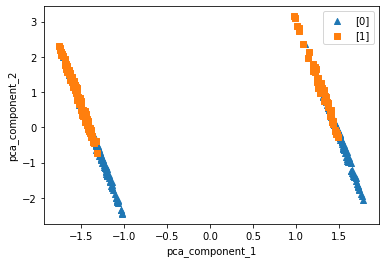

In [16]:
# 2차원으로 PCA 축소한 데이터 시각화
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = DF_pca[DF_pca['target']==i]['pca_component_1']
    y_axis_data = DF_pca[DF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=[i])
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [29]:
pca.n_components

2

In [30]:
pca.n_features_

4

In [32]:
pca.n_samples_

400

In [33]:
# 특잇값
pca.singular_values_

array([28.43199933, 21.30213979])

In [26]:
# 선택한 각 구성 요소에서 설명하는 분산의 양입니다. 분산 추정은 n_samples - 1 자유도를 사용합니다.
pca.explained_variance_

array([2.02601149, 1.13729614])

In [28]:
# 데이터의 최대 분산 방향을 나타내는 특징 공간의 주축
# 구성 요소는 Explain_variance_에 따라 정렬됩니다.
pca.components_

array([[-0.11619943, -0.10038962, -0.69872012,  0.69872012],
       [ 0.69378296,  0.70372708, -0.10824368,  0.10824368]])

In [27]:
#  PCA 컴포넌트별로 차지하는 변동성 비율
pca.explained_variance_ratio_

array([0.50523662, 0.28361322])

## K-means

In [18]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(df3_pca)

KMeans(n_clusters=4, random_state=42)

In [19]:
# 굽집 결과
km.labels_

array([0, 0, 1, 1, 0, 0, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 0, 1, 2, 3, 0,
       0, 1, 1, 1, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 3, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 3, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 2, 0, 0, 3, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 3, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 0, 3, 2, 2, 3, 2,
       1, 2, 2, 2, 1, 0, 3, 2, 1, 3, 3, 0, 2, 2, 3, 2, 0, 1, 3, 3, 2, 0,
       3, 3, 1, 3, 1, 3, 0, 1, 1, 0, 3, 3, 1, 3, 1, 0, 3, 3, 1, 2, 3, 1,
       2, 3, 2, 0, 3, 0, 3, 3, 2, 2, 1, 2, 0, 2, 1, 1, 3, 0, 0, 1, 2, 1,
       1, 3, 2, 1, 2, 2, 2, 0, 1, 1, 2, 3, 2, 2, 3,

In [20]:
y_predict = km.predict(df3_pca)
y_predict

array([0, 0, 1, 1, 0, 0, 1, 3, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0,
       1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 0, 0, 1, 2, 3, 0,
       0, 1, 1, 1, 0, 1, 1, 3, 0, 2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 3, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 3, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 2, 0, 0, 3, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 3, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 3, 1, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 0, 3, 2, 2, 3, 2,
       1, 2, 2, 2, 1, 0, 3, 2, 1, 3, 3, 0, 2, 2, 3, 2, 0, 1, 3, 3, 2, 0,
       3, 3, 1, 3, 1, 3, 0, 1, 1, 0, 3, 3, 1, 3, 1, 0, 3, 3, 1, 2, 3, 1,
       2, 3, 2, 0, 3, 0, 3, 3, 2, 2, 1, 2, 0, 2, 1, 1, 3, 0, 0, 1, 2, 1,
       1, 3, 2, 1, 2, 2, 2, 0, 1, 1, 2, 3, 2, 2, 3,

In [21]:
# 각각 모은 샘플 개수 확인
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([131, 141,  65,  63], dtype=int64))

## 군집 결과 시각화

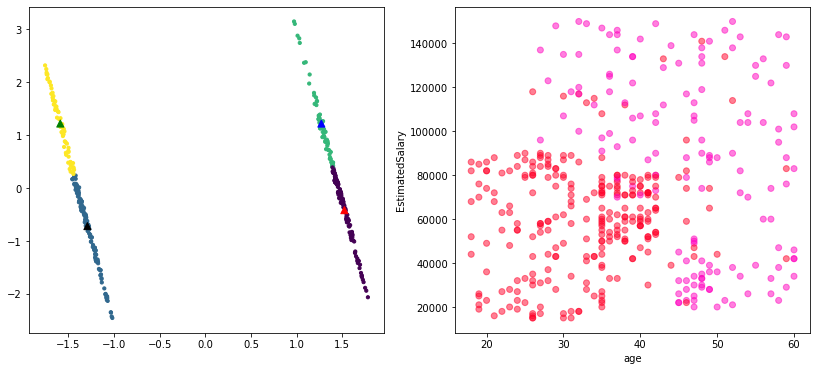

In [22]:
plt.figure(figsize=(14,6))

# k-means modeling
plt.subplot(1,2,1)
plt.scatter(df3_pca[:,0], df3_pca[:,1],
           c = km.labels_, marker='o', s=10)
plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
            c=['r','k','b','g'], marker='^', s=50)

# 나이, 연봉으로 구매(0,1)산점도 그래프
plt.subplot(1,2,2)
plt.scatter(x['Age'], x['EstimatedSalary'], c=y, cmap='gist_rainbow', alpha=0.5)
plt.xlabel('age')
plt.ylabel('EstimatedSalary')
plt.show()

## 최적의 K개수 : elbow

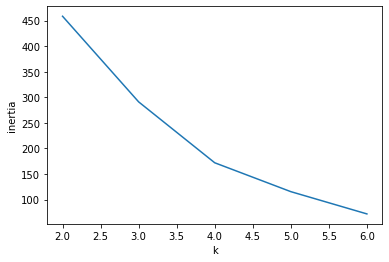

In [23]:
inertia=[]
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df3_pca)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# 여기는 엘보우 k개가 3,4가 나옴..

## 잘 군집 되었는지 평가

In [24]:
# 잘 군집되었는지 평가
# 작을수록 좋음, PCA 안했을 때는 323점
km.inertia_

71.85715339227427

### 궁금한 점 
- 결과점수는 잘 나왔는데 그래서 일직선 2개로 변환된 데이터들이 무엇인지 어떻게 설명할 것인지?
- 축은 왜 2개의 일렬로 생성되었는지? 
- 축의 방향은 왜 그렇게 생성이 되었는지? 
- 2개의 축 그래프가 뜻하는 것은 무엇인지? 
- 2개의 component 주요 요소는 어떤 변수들로 이루어졌는지?